In [57]:
# setup environment to print out output for multiple commands in one cell 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Chapter 1 - Vectors, Matrices, Arrays

## 1. Create a vector

In [17]:
# create a vector as a row 

import numpy as np 

vector_row = np.array([1, 2, 3])     # dim = 1*3
print(vector_row)

[1 2 3]


In [18]:
# create a vector as a row 

import numpy as np 

vector_column = np.array([[1], 
                          [2], 
                          [3]])     
print(vector_column)

[[1]
 [2]
 [3]]


## 2. Create a matrix

There is `np.mat()` matrix data structure, but it's not recommended for 2 reasons: <br>
(1) arrays are de facto standard data structure of Numpy; <br>
(2) the vast majority of Numpy operations return arrays, not matrix objects. <br>

Use `np.array()` to create the matrix instead.

In [19]:
import numpy as np 

matrix = np.array([[1, 2],
         [3, 4], 
         [5, 6]])
print(matrix)

[[1 2]
 [3 4]
 [5 6]]


## 3. Create a sparse matrix

In ML, we have a huge amount of data, but most of the elements in the data are zeros. <br>
**Example**: we have a data, where rows are every Netflix user, and columns are how many times a user has watched that particular movie. <br>
Since most people don't watch most of the movies, most elements would be zero. <br>

Sparse matrix only store nonzero elements and assume all other values will be zero. 

**Example 1**

In [27]:
import numpy as np 
from scipy import sparse 

# step 1: create a matrix 
matrix = np.array([[0, 0], 
                 [0, 1], 
                 [3, 0]])

# step 2: create compressed sparse row matrix 
matrix_sparse = sparse.csr_matrix(matrix)      # use sparse function, then csr_matrix function (csr = compressed sparse row)

print("Density matrix is: \n", matrix)  
print("\nSparse matrix is: \n", matrix_sparse)  
print("\n(1, 1) indicates that row 1 and col 1 is element '1' in the density matrix")
print("\n(2, 0) indicates that row 2 and col 0 is element '3' in the density matrix")

Density matrix is: 
 [[0 0]
 [0 1]
 [3 0]]

Sparse matrix is: 
   (1, 1)	1
  (2, 0)	3

(1, 1) indicates that row 1 and col 1 is element '1' in the density matrix

(2, 0) indicates that row 2 and col 0 is element '3' in the density matrix


**Example 2**

In [28]:
import numpy as np 
from scipy import sparse 

# step 1: create a matrix 
matrix = np.array([[1, 0, 0, 0, 0, 0], 
                 [0, 0, 2, 0, 0, 1], 
                 [0, 0, 0, 2, 0, 0]])

# step 2: create compressed sparse row matrix 
matrix_sparse = sparse.csr_matrix(matrix)      # use sparse function, then csr_matrix function (csr = compressed sparse row)

print("Density matrix is: \n", matrix)  
print("\nSparse matrix is: \n", matrix_sparse)  
print("\n(0, 0) indicates that row 0 and col 0 is element '1' in the density matrix")
print("\n(1, 2) indicates that row 1 and col 2 is element '2' in the density matrix")
print("\n(1, 5) indicates that row 1 and col 5 is element '1' in the density matrix")
print("\n(2, 3) indicates that row 2 and col 3 is element '2' in the density matrix")

Density matrix is: 
 [[1 0 0 0 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]

Sparse matrix is: 
   (0, 0)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2

(0, 0) indicates that row 0 and col 0 is element '1' in the density matrix

(1, 2) indicates that row 1 and col 2 is element '2' in the density matrix

(1, 5) indicates that row 1 and col 5 is element '1' in the density matrix

(2, 3) indicates that row 2 and col 3 is element '2' in the density matrix


## 4. Select elements

**Ex 1: vector**

In [29]:
vector = np.array([1, 2, 3, 4, 5, 6])

# select 2nd position
vector[2]

3

In [43]:
matrix = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

# select row 1 position 1
print("Row 1 position 1 is:", matrix[1,1])

# select row 1
print("\nRow 1 is:", matrix[1,])

# select first 2 rows
print("\nFirst two rows are: \n", matrix[:2, :])

# select 2nd column for all rows
print("\nSecond column for all rows are: \n", matrix[:,1:2])

Row 1 position 1 is: 5

Row 1 is: [4 5 6]

First two rows are: 
 [[1 2 3]
 [4 5 6]]

Second column for all rows are: 
 [[2]
 [5]
 [8]]


## 5. Describe a matrix

In [46]:
import numpy as np 

matrix = np.array([[1,2,3,4],
                  [5,6,7,8],
                  [9,10,11,12]])

# view number of rows and columns of the matrix 
print("Number of rows and columns of the matrix :", matrix.shape)

# view number of elements
print("\nNumber of elements in the matrix is:", matrix.size)

# view number of dimensions 
print("\nNumber of dimension of the matrix is:", matrix.ndim)

Number of rows and columns of the matrix : (3, 4)

Number of elements in the matrix is: 12

Number of dimension of the matrix is: 2


## 6. Apply operations to elements

Numpy's `vectorize()` class converts a function into a function that can apply to all elements in an array or slice of an array. <br>
`vectorize` is essenstially a **for loop** over the elements and doesn't increase performance. <br>
Numpy arrays allow us to perform operations between arrays even if their dimensions are not the same (broadcasting).

**Ex1: add 100 to every element in matrix**

In [51]:
# method 1
matrix = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

matrix + 100

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

In [52]:
# method 2

# create function that adds 100 to something
add_100 = lambda i:i + 100 

# create vectorized function 
vectorized_add_100 = np.vectorize(add_100)

# apply function to all elements in matrix 
vectorized_add_100(matrix)

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

## 7. Find max and min values

In [58]:
matrix = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

# find max value 
print("Maximum value in the matrix is: ", np.max(matrix))

# find min value 
print("\nMinimum value in the matrix is: ", np.min(matrix))

# find max value for each column
print("\nMaximum value for each column is: ", np.max(matrix, axis = 0))

# find max value for each row
print("\nMaximum value for each row is: ", np.max(matrix, axis = 1))

Maximum value in the matrix is:  9

Minimum value in the matrix is:  1

Maximum value for each column is:  [7 8 9]

Maximum value for each row is:  [3 6 9]


## 8. Find average, variance, sd

In [66]:
matrix = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

# mean
print("Mean of the matrix is: ", np.mean(matrix))

# variance
print("\nVariance of the matrix is: ", np.var(matrix))

# sd
print("\nStandard deviation of the matrix is: ", np.std(matrix))

# mean in each column
print("\nMean of each column is: ", np.mean(matrix, axis = 0))

# mean in each row
print("\nMean of each row is: ", np.mean(matrix, axis = 1))

Mean of the matrix is:  5.0

Variance of the matrix is:  6.666666666666667

Standard deviation of the matrix is:  2.581988897471611

Mean of each column is:  [4. 5. 6.]

Mean of each row is:  [2. 5. 8.]


## 9. Reshape arrays

**Ex1: change dimension of matrix**

In [88]:
matrix = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9],
                  [10,11,12]])

# dimension of matrix
print("Dimension of matrix is: ", matrix.size)

# change matrix dimension from 4*3 to 2*6
print("\nThe new matrix is: \n", matrix.reshape(2,6))

Dimension of matrix is:  12

The new matrix is: 
 [[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


**Ex2: flatten a matrix**

In [98]:
matrix = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9],
                  [10,11,12]])

# method 1
print("\nIf use (-1, 1), we get: \n", matrix.reshape(1, -1))

# method 2
print("\nIf use total dimension to reshape, we get: \n", matrix.reshape(12))      # 1D array of that length

# method 3
matrix.flatten()


If use (-1, 1), we get: 
 [[ 1  2  3  4  5  6  7  8  9 10 11 12]]

If use total dimension to reshape, we get: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12]


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## 10. Transpose a vector/matrix

**Ex1: transpose a matrix**

In [76]:
matrix = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

# take matrix transpose
print("Transpose of the matrix is: \n", matrix.T)

Transpose of the matrix is: 
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


**Ex2: transpose a vector**

In [84]:
vector = np.array([1,2,3,4,5,6])

# method 1: not change
vector.T 

# method 2: this works
vector.reshape(6,1)

array([1, 2, 3, 4, 5, 6])

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

**Ex3: transpose a single line matrix**

In [86]:
matrix = np.array([[1,2,3,4,5,6]])

# method 1
matrix.T

# method 2
matrix.reshape(6,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

## 11. Find rank of matrix

In [93]:
matrix = np.array([[1,1,1],
                  [1,1,10],
                  [1,1,15]])

print("Rank of matrix is: ", np.linalg.matrix_rank(matrix))

Rank of matrix is:  2


## 12. Find determinant

In [94]:
matrix = np.array([[1,2,3],
                  [2,4,6],
                  [3,8,9]])

print("Determinant of matrix is: ", np.linalg.det(matrix))

Determinant of matrix is:  0.0


## 13. Diagnal of matrix

In [97]:
matrix = np.array([[1,2,3],
                  [2,4,6],
                  [3,8,9]])

print("Diagonal of matrix is: ", matrix.diagonal())

print("\nDiagonal one above the main diagonal is: ", matrix.diagonal(offset=1))

print("\nDiagonal one below the main diagonal is: ", matrix.diagonal(offset=-1))

Diagonal of matrix is:  [1 4 9]

Diagonal one above the main diagonal is:  [2 6]

Diagonal one below the main diagonal is:  [2 8]


## 14. Trace of matrix

In [100]:
matrix = np.array([[1,2,3],
                  [2,4,6],
                  [3,8,9]])

# method 1
print("Trace of matrix is: ", matrix.trace())

# method 2
sum(matrix.diagonal())

Trace of matrix is:  14


14

## 15. Eigenvalues and eigenvectors

In [104]:
matrix = np.array([[1, -1, 3], 
                  [1, 1, 6], 
                  [3, 8, 9]])

# get eigenvalues & eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix)

print("Eigenvalues are: ", eigenvalues)

print("\nEigenvectors are: \n", eigenvectors)

Eigenvalues are:  [13.55075847  0.74003145 -3.29078992]

Eigenvectors are: 
 [[-0.17622017 -0.96677403 -0.53373322]
 [-0.435951    0.2053623  -0.64324848]
 [-0.88254925  0.15223105  0.54896288]]


## 16. Dot products

In [106]:
vector_a = np.array([1, 2, 3])
vector_b = np.array([4, 5, 6])

print("Dot product for the two vectors is: ", np.dot(vector_a, vector_b))

Dot product for the two vectors is:  32


## 17. Add and subtract matrices

In [112]:
matrix_a = np.array([[1, 1, 1], 
                  [1, 1, 1], 
                  [1, 1, 2]])

matrix_b = np.array([[1, 3, 1], 
                  [1, 3, 1], 
                  [1, 3, 8]])

# sum of matrices 
# method 1
print("Sum of the matrices is: \n", np.add(matrix_a, matrix_b))

# method 2: 
matrix_a + matrix_b

# difference of matrices 
# method 1
print("\nMatrix A - Matrix B is: \n", np.subtract(matrix_a, matrix_b))

# method 2
matrix_a - matrix_b

Sum of the matrices is: 
 [[ 2  4  2]
 [ 2  4  2]
 [ 2  4 10]]


array([[ 2,  4,  2],
       [ 2,  4,  2],
       [ 2,  4, 10]])


Matrix A - Matrix B is: 
 [[ 0 -2  0]
 [ 0 -2  0]
 [ 0 -2 -6]]


array([[ 0, -2,  0],
       [ 0, -2,  0],
       [ 0, -2, -6]])

## 18. Multiply matrix

In [118]:
matrix_a = np.array([[1, 1], 
                  [1, 2]])

matrix_b = np.array([[1, 3], 
                  [1, 2]])

# method 1
print("Product of the matrices is: \n", np.dot(matrix_a, matrix_b))

# method 2
matrix_a @ matrix_b

Product of the matrices is: 
 [[2 5]
 [3 7]]


array([[2, 5],
       [3, 7]])

## 19. Invert a matrix

In [119]:
matrix = np.array([[1, 4], 
                  [2, 5]])

print("Invert of matrix is: \n", np.linalg.inv(matrix))

Invert of matrix is: 
 [[-1.66666667  1.33333333]
 [ 0.66666667 -0.33333333]]


## 20.Generate random values

**Ex1: generate random floats**

In [120]:
# set seed
np.random.seed(0)

print("Generate 3 random floats between 0.0 and 1.0, we get: \n", np.random.random(3))

Generate 3 random floats between 0.0 and 1.0, we get: 
 [0.5488135  0.71518937 0.60276338]


**Ex2: generate random integers**

In [126]:
# set seed
np.random.seed(10)

print("Generate 3 random integers between 1 and 10, we get: \n", np.random.randint(0, 11, 3))    # "0, 11" is the range, "3" is number of samples

Generate 3 random integers between 1 and 10, we get: 
 [9 4 0]


**Ex3: draw numbers from a distribution**

In [133]:
print("Draw 3 numbers from a normal distribution, with mean 0.0, sd 1.0, we get\n", 
      np.random.normal(0.0, 1.0, 3))     # "0.0" is mean, "1.0" is sd, "3" is number of samples

print("\nDraw 3 numbers from a logistic distribution, with mean 0.0, scale 1.0, we get\n", 
      np.random.logistic(0.0, 1.0, 3))     # "0.0" is mean, "1.0" is scale, "3" is number of samples

print("\nDraw 3 numbers greater than or equal to 1.0 and less than 2.0, we get: \n",
     np.random.uniform(1.0, 2.0, 3))    # "1.0" is minimum, "3.0" is maximum, "3" is number of samples

Draw 3 numbers from a normal distribution, with mean 0.0, sd 1.0, we get
 [-1.02735202 -0.30860049 -0.15373549]

Draw 3 numbers from a logistic distribution, with mean 0.0, scale 1.0, we get
 [-2.8164032   1.18282752 -4.42881266]

Draw 3 numbers greater than or equal to 1.0 and less than 2.0, we get: 
 [1.61194334 1.33188226 1.55964837]


# Chapter 2 - Loading data

## 1. Load sample dataset

`scikit-learn` comes with a number of popular datasets for you to use.

**Ex1: digits dataset**

In [143]:
# load scikit-learn's datasets
from sklearn import datasets

# load digits dataset
digits = datasets.load_digits()

# create features matrix
features = digits.data

# create target vector
target = digits.target

print("First observation is: \n", features[0])

First observation is: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


**Ex2: boston dataset**

In [144]:
# load boston dataset
boston = datasets.load_boston()

# create features matrix
features = boston.data

# create target vector
target = boston.target

print("First observation is: \n", features[0])

First observation is: 
 [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]


**Ex3: iris dataset**

In [145]:
# load iris dataset
iris = datasets.load_iris()

# create features matrix
features = iris.data

# create target vector
target = iris.target

print("First observation is: \n", features[0])

First observation is: 
 [5.1 3.5 1.4 0.2]


## 2. Create a simulated dataset 

In [2]:
from sklearn.datasets import make_regression

## (1) simulated data for linear regression

In [6]:
# create features matrix, target vector, true coefficients 

features, target, coefficients = make_regression(n_samples = 100,
                                                n_features = 3,
                                                n_informative = 3,
                                                n_targets = 1,
                                                noise = 0.0,
                                                coef = True, 
                                                random_state = 1)

In [7]:
# view feature matrix and target vector

print('Feature Matrix\n', features[:3])

print('\nTarget Vector\n', target[:3])

Feature Matrix
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]

Target Vector
 [-10.37865986  25.5124503   19.67705609]


## (2) simulated data for classification

In [8]:
from sklearn.datasets import make_classification

In [9]:
# create features matrix and target vector 
#  "weights" return 25% data for one class, and 75% for another calss.

featuers, target = make_classification(n_samples = 100,
                                      n_features = 3, 
                                      n_informative = 3,
                                      n_redundant = 0,
                                      n_classes = 2,
                                      weights = [0.25, 0.75],
                                      random_state = 1)

In [10]:
# view feature matrix and target vector

print('Feature Matrix\n', features[:3])

print('\nTarget Vector\n', target[:3])

Feature Matrix
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]

Target Vector
 [1 0 0]


## (3) simulated data for clustering

In [11]:
from sklearn.datasets import make_blobs

In [12]:
# create feature matrix and target vector 
# "centers" determines number of clusters generated.

features, target = make_blobs(n_samples = 100,
                             n_features = 2,
                             centers = 3,
                             cluster_std = 0.5,
                              shuffle = True,
                              random_state = 1)

In [13]:
# view feature matrix and target vector

print('Feature Matrix\n', features[:3])

print('\nTarget Vector\n', target[:3])

Feature Matrix
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]

Target Vector
 [0 1 1]


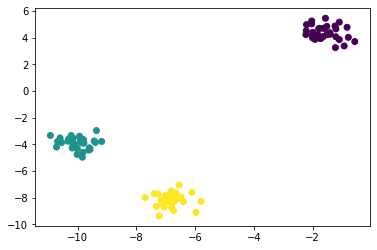

In [16]:
# visualize clusters 

import matplotlib.pyplot as plt

plt.scatter(features[:,0], features[:,1], c = target)
plt.show()

# 3. Load csv file

In [22]:
import pandas as pd 

# create URL 
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

# load csv data 
dataframe = pd.read_csv(url)

# see head of data 
dataframe.head(2)

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.0,no,3,18,7,4
1,5,0,female,27.0,4.0,no,4,14,6,4


# 4. load excel file

In [49]:
import pandas as pd 

# create url 
url = 'https://go.microsoft.com/fwlink/?LinkID=521962'

# load data 
dataframe = pd.read_excel(url)

# head of data 
dataframe.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


# Chapter 3 - Data wrangling

## 0. Intro

In [51]:
import pandas as pd

# create url 
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

# load data as dataframe
dataframe = pd.read_csv(url)

# see head 
dataframe.head(5)

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


## 1. create data frame 

**Ex1:** create data frame

In [52]:
import pandas as pd 

# create empty data frame
df = pd.DataFrame()

# add columns
df['name'] = ['Jack', 'Steven']
df['age'] = [38, 25]
df['driver'] = [True, False]

# show dataframe
df

,name,age,driver
0,Jack,38,True
1,Steven,25,False


**Ex2:** append data

In [55]:
# create a new row 
new_person = pd.Series(['Molly', 40, True], index = ['name', 'age', 'driver'])

# append row to original data 
df.append(new_person, ignore_index = True)

,name,age,driver
0,Jack,38,True
1,Steven,25,False
2,Molly,40,True


## 2. Describe data 

In [60]:
import pandas as pd

# create url 
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

# load data as dataframe
dataframe = pd.read_csv(url)

# see head 
dataframe.head(2)

# show dimension of data 
print("Data dimension is: ", dataframe.shape)

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.0,no,3,18,7,4
1,5,0,female,27.0,4.0,no,4,14,6,4


Data dimension is:  (601, 10)


## (1) get data description

In [61]:
# show statistics 
dataframe.describe()

,Unnamed: 0,affairs,age,yearsmarried,religiousness,education,occupation,rating
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1059.722130,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780
std,914.904611,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179
min,4.000000,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000
25%,528.000000,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000
50%,1009.000000,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000
75%,1453.000000,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000
max,9029.000000,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000


## 3. navigate dataframes

In data selection, `loc` is label-based, and `iloc` is integer index based.

In [64]:
import pandas as pd 

# create url 
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

# load data as dataframe
dataframe = pd.read_csv(url)

## (1) select first row 

In [65]:
dataframe.iloc[0]

Unnamed: 0          4
affairs             0
gender           male
age              37.0
yearsmarried     10.0
children           no
religiousness       3
education          18
occupation          7
rating              4
Name: 0, dtype: object

## (2) select 1-3 rows (python index)

In [66]:
dataframe.iloc[1:4]

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
1,5,0,female,27.0,4.0,no,4,14,6,4
2,11,0,female,32.0,15.0,yes,1,12,1,4
3,16,0,male,57.0,15.0,yes,5,18,6,5


## (3) select 0-3 rows (python index)

In [67]:
dataframe.iloc[:4]

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.0,no,3,18,7,4
1,5,0,female,27.0,4.0,no,4,14,6,4
2,11,0,female,32.0,15.0,yes,1,12,1,4
3,16,0,male,57.0,15.0,yes,5,18,6,5


## (4) set index, then select rows by a value

**Ex:** set index by "children", then select values for all "no" values

In [68]:
dataframe = dataframe.set_index(dataframe['children'])

dataframe.loc['no']

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
children,,,,,,,,,,
no,4,0,male,37.0,10.00,no,3,18,7,4
no,5,0,female,27.0,4.00,no,4,14,6,4
no,23,0,male,22.0,0.75,no,2,17,6,3
no,29,0,female,32.0,1.50,no,2,17,5,5
no,44,0,female,22.0,0.75,no,2,12,1,3
...,...,...,...,...,...,...,...,...,...,...
no,1669,2,female,27.0,4.00,no,1,17,3,1
no,1685,7,female,22.0,4.00,no,1,16,3,5
no,1732,12,male,37.0,15.00,no,3,14,6,2


## 4. select rows based on conditions

In [69]:
import pandas as pd 

# create url 
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

# load data as dataframe
dataframe = pd.read_csv(url)

**Ex1:** select top 2 rows where column "children" value is "no"

In [70]:
dataframe[dataframe['children'] == 'no'].head(2)

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.0,no,3,18,7,4
1,5,0,female,27.0,4.0,no,4,14,6,4


**Ex2:** select top 2 rows where column "children" value is "no", and rating >= 2

In [72]:
dataframe[(dataframe['children'] == 'no') & (dataframe['rating'] >= 2)].head(3)

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
4,23,0,male,22.0,0.75,no,2,17,6,3


## 5. replace values

## (1) replace value for one variable

In [73]:
import pandas as pd 

# create url 
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

# load data as dataframe
dataframe = pd.read_csv(url)

In [74]:
# replace "female" with "women"

dataframe['gender'].replace("female", "woman").head(2)

0     male
1    woman
Name: gender, dtype: object

## (2) replace value for 2 variables

In [85]:
# replace "female" with "women", and "male" with "men"

dataframe['gender'].replace(["female", "male"], ["women", "men"]).head(5)

0      men
1    women
2    women
3      men
4      men
Name: gender, dtype: object

## (3) replace for the whole data

**Ex1**: replace for value "1" with "NA"

In [88]:
dataframe.replace(1, "NA").head(5)

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,NA,12,NA,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


**Ex2:** replace values for regular expressions 

In [89]:
# "r" in front of expression is to specify regular expression
dataframe.replace(r"ale", "ALE", regex=True).head(5)

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,mALE,37.0,10.00,no,3,18,7,4
1,5,0,femALE,27.0,4.00,no,4,14,6,4
2,11,0,femALE,32.0,15.00,yes,1,12,1,4
3,16,0,mALE,57.0,15.00,yes,5,18,6,5
4,23,0,mALE,22.0,0.75,no,2,17,6,3


## 6. rename columns

In [90]:
import pandas as pd 

# create url 
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

# load data as dataframe
dataframe = pd.read_csv(url)

**Ex1:** rename varibale "gender" to "sex"

In [91]:
dataframe.rename(columns = {'gender': 'sex'}).head(3)

,Unnamed: 0,affairs,sex,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.0,no,3,18,7,4
1,5,0,female,27.0,4.0,no,4,14,6,4
2,11,0,female,32.0,15.0,yes,1,12,1,4


`rename()`accept a dictionary as a parameter. We can use dictionary to change multiple column names at once.

**Ex2:** rename 2 variables

In [92]:
dataframe.rename(columns = {'gender': 'sex', 'occupation': 'position'}).head(3)

,Unnamed: 0,affairs,sex,age,yearsmarried,children,religiousness,education,position,rating
0,4,0,male,37.0,10.0,no,3,18,7,4
1,5,0,female,27.0,4.0,no,4,14,6,4
2,11,0,female,32.0,15.0,yes,1,12,1,4


**Ex3:** rename all variables

In [98]:
import collections

# create dictionary 
column_names = collections.defaultdict(str)

# create keys
for name in dataframe.columns:
    column_names[name]
    
# show dictionary
column_names

''

''

''

''

''

''

''

''

''

''

defaultdict(str,
            {'Unnamed: 0': '',
             'affairs': '',
             'gender': '',
             'age': '',
             'yearsmarried': '',
             'children': '',
             'religiousness': '',
             'education': '',
             'occupation': '',
             'rating': ''})

## 7. find min, max, sum, average, count

**Ex1**: show min/max/sum/average/count for "age"

In [99]:
import pandas as pd 

# create url 
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

# load data as dataframe
dataframe = pd.read_csv(url)

In [102]:
print('Maximum age is: ', dataframe['age'].max())
print('Minimum age is: ', dataframe['age'].min())
print('Average age is: ', dataframe['age'].mean())
print('Sum of age is: ', dataframe['age'].sum())
print('Total count of age is: ', dataframe['age'].count())

Maximum age is:  57.0
Minimum age is:  17.5
Average age is:  32.48752079866888
Sum of age is:  19525.0
Total count of age is:  601


**Ex2:** show total count for each variable

In [106]:
print("Total count for each variable is\n: ", dataframe.count())

Total count for each variable is
:  Unnamed: 0       601
affairs          601
gender           601
age              601
yearsmarried     601
children         601
religiousness    601
education        601
occupation       601
rating           601
dtype: int64


## 8. find unique values

In [108]:
import pandas as pd 

# create url 
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

# load data as dataframe
dataframe = pd.read_csv(url)

**Ex1**: select all unique values in a column

In [109]:
dataframe['gender'].unique()

array(['male', 'female'], dtype=object)

**Ex2:** show total counts for each unique value

In [110]:
dataframe['gender'].value_counts()

female    315
male      286
Name: gender, dtype: int64

In [111]:
dataframe['rating'].value_counts()

5    232
4    194
3     93
2     66
1     16
Name: rating, dtype: int64

**Ex3:** show number of unique cases

In [112]:
dataframe['rating'].nunique()

5

## 9. Handle missing values 

In [113]:
import pandas as pd 

# create url 
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

# load data as dataframe
dataframe = pd.read_csv(url)

**Ex1:** show/select missing values 

In [139]:
# load data 
df = pd.read_csv('titanic.csv')

# show all missing values for "Age" 
df[df['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


`NaN` means "not a number. <br>

To replace a value with "NaN," we can do this:

**Ex2:** replace a value with "NaN"

In [179]:
import pandas as pd 

# create url 
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

# load data as dataframe
dataframe = pd.read_csv(url)

In [180]:
import numpy as np

# replace values with NaN
df['Sex'] = df['Sex'].replace('male', np.nan)

df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Ex3:** set missing values to "999"

In [144]:
df = pd.read_csv('titanic.csv', na_values = [np.nan, 'NONE', -999])
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 10. delete a column

**Ex1:** drop a column by name

In [145]:
# 'axis=0' indicate row, 'axis=1' indicate column

df.drop('Age', axis=1).head(2)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C


**Ex2:** drop a few columns by names

In [147]:
df.drop(['Age', 'Ticket', 'Fare'], axis = 1).head(3)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,NaN,S


`drop()` is the common method of deleting a column. <br>
`del` is not recommended. <br>
Never use pandas' `inplace=True`argument.

**Ex3:** drop a column by index

In [150]:
df_dropped = df.drop(df.columns[1], axis = 1)

df_dropped.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 11. delete a row

**Ex1:** delete rows by values

In [151]:
df[df['Sex'] != 'male'].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


**Ex2:** delete a row by specific value

In [153]:
df[df['Name'] != 'Heikkinen, Miss. Laina'].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


**Ex3:** delete a single row by row index

In [155]:
# delete the 0th row
df[df.index != 0].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 12. drop duplicate rows

In [210]:
import pandas as pd 

# create url 
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv'

# load data as dataframe
df = pd.read_csv(url)

## (1) see duplicated rows

In [217]:
df = pd.read_csv("titanic.csv")

# see duplicated rows
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
892,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


## (2) drop duplicated rows

In [218]:
# drop duplicates 

df_new = df.drop_duplicates()

In [219]:
# see if any duplicated 

df_new[df_new.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


`drop_duplicates()` drop rows that match perfectly across all columns. <br>
Under this condition, every row is actually unique. <br>
Often, we want to consider only a subset of columns to check for duplicate rows. 

In [229]:
df.drop_duplicates(subset=['Sex'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


`drop_duplicates()` defaults to keep the first occurrence of duplicated row and drop the rest. <br>
We can use **keep** parameter to keep the last occurrence.

In [230]:
df.drop_duplicates(subset=['Sex'], keep = 'last')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
892,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


## 13. group rows by values

In [231]:
# load data
df = pd.read_csv("titanic.csv")

**Ex1:** Group rows by the column "Sex" values, calculate mean of each group

In [232]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,452.599309,0.188256,2.392055,30.726645,0.428325,0.234888,25.464945


`groupby()` needs to be paired with some operation we want to apply to each group (mean, median, etc.)

**Ex2:** group by 'survived' and get counts <br>
The code below doesn't make sense

In [237]:
# survived counts (either 0 or 1)

df.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,551,551,551,551,424,551,551,551,551,68,551
1,342,342,342,342,290,342,342,342,342,136,340


We need to specify: count "Survived" by "Name"

In [238]:
df.groupby('Survived')['Name'].count()

Survived
0    551
1    342
Name: Name, dtype: int64

**Ex3:** group by "Sex" first, then group by "Survived," and calculate mean

In [239]:
df.groupby(['Sex', 'Survived'])['Age'].mean()

Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

## 14. group rows by time

In [252]:
import numpy as np 
import pandas as pd

# create date range
time_index = pd.date_range('06/06/2017', periods = 100000, freq = '30S')

# create dataframe
df = pd.DataFrame(index = time_index)

# create column of random values
df['Sale_amount'] = np.random.randint(1, 10, 100000)

# raw data
df.head(3)

,Sale_amount
2017-06-06 00:00:00,2
2017-06-06 00:00:30,8
2017-06-06 00:01:00,7


**Ex1:** group data by "week"

In [253]:
# group rows by week, get sum for each week

df.resample('W').sum()

,Sale_amount
2017-06-11,86648
2017-06-18,100884
2017-06-25,100434
2017-07-02,100561
2017-07-09,100886
2017-07-16,10447


**Ex2:** group data by 2 weeks

In [255]:
df.resample('2W').sum()

,Sale_amount
2017-06-11,86648
2017-06-25,201318
2017-07-09,201447
2017-07-23,10447


**Ex3:** group data by 1 month

In [259]:
df.resample('M').count()

,Sale_amount
2017-06-30,72000
2017-07-31,28000


By default, `resample()` returns label of teh right "edge" (the last label) of the time group. <br>
To change that, we can use **label** parameter.

**Ex4**: groupby month, use "label" parameter 

In [260]:
# group by month

df.resample('M', label = 'left').count()

,Sale_amount
2017-05-31,72000
2017-06-30,28000


## 15. loop over a column

**Ex1:** for loop: print first 2 names uppercased

In [261]:
df = pd.read_csv("titanic.csv")

# print first 2 names uppercased
for name in df['Name'][0:2]:
    print(name.upper())

BRAUND, MR. OWEN HARRIS
CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS THAYER)


**Ex2:** list comprehensions: print first 2 names uppercased

In [262]:
[name.upper() for name in df['Name'][0:2]]

['BRAUND, MR. OWEN HARRIS',
 'CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS THAYER)']

## 16. apply a function over all elements in a column

In [263]:
# create a function
def uppercase(x):
    return x.upper()

df['Name'].apply(uppercase)[0:3]

0                              BRAUND, MR. OWEN HARRIS
1    CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                               HEIKKINEN, MISS. LAINA
Name: Name, dtype: object

## 17. apply a function to groups

`apply()` is particularly useful when you want to apply a function to groups.

In [264]:
df = pd.read_csv("titanic.csv")

df.groupby('Sex').apply(lambda x: x.count())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,,
female,314,314,314,314,314,261,314,314,314,314,97,312
male,579,579,579,579,579,453,579,579,579,579,107,579


## 18. concatenate dataframes

In [268]:
import pandas as pd

# create a dictionary
data_a = {'id': ['1', '2', '3'],
          'first': ['Alex', 'Amy', 'Allen'],
          'last': ['Anderson', 'Jack', 'Lee']}

# make it dataframe
df_a = pd.DataFrame(data_a, columns = ['id', 'first', 'last'])
df_a

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Jack
2,3,Allen,Lee


In [269]:
# create a dictionary
data_b = {'id': ['4', '5', '6'],
          'first': ['Bill', 'Jane', 'Shawn'],
          'last': ['Bonder', 'Black', 'Smith']}

# make it dataframe
df_b = pd.DataFrame(data_b, columns = ['id', 'first', 'last'])
df_b

,id,first,last
0,4,Bill,Bonder
1,5,Jane,Black
2,6,Shawn,Smith


**Ex1:** concatenate dataframe by rows

In [271]:
pd.concat([df_a, df_b], axis = 0)

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Jack
2,3,Allen,Lee
0,4,Bill,Bonder
1,5,Jane,Black
2,6,Shawn,Smith


**Ex2:** concatenate dataframe by columns

In [272]:
pd.concat([df_a, df_b], axis = 1)

,id,first,last,id,first,last
0,1,Alex,Anderson,4,Bill,Bonder
1,2,Amy,Jack,5,Jane,Black
2,3,Allen,Lee,6,Shawn,Smith


**Ex3:** we can also append the data 

In [275]:
df_a.append(df_b, ignore_index=True)

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Jack
2,3,Allen,Lee
3,4,Bill,Bonder
4,5,Jane,Black
5,6,Shawn,Smith


## 19. merge dataframe

In [276]:
import pandas as pd

# create dictionary 
employee_data = {'employee_id': ['1', '2', '3', '4'], 
                 'name': ['Amy', 'Jones', 'Lee', 'Kate']}

df_employees = pd.DataFrame(employee_data, columns = ['employee_id', 'name'])
df_employees

,employee_id,name
0,1,Amy
1,2,Jones
2,3,Lee
3,4,Kate


In [277]:
# create dictionary 
sales_data = {'employee_id': ['3', '4', '5', '6'], 
                 'total_sales': ['2345', '4020', '2039', '1030']}

df_sales = pd.DataFrame(sales_data, columns = ['employee_id', 'total_sales'])
df_sales

,employee_id,total_sales
0,3,2345
1,4,4020
2,5,2039
3,6,1030


**Ex1:** merge dataframe by 'employee_id'

In [278]:
# inner join: only keep matches "employee_id" for both dataframe

pd.merge(df_employees, df_sales, on = 'employee_id')

,employee_id,name,total_sales
0,3,Lee,2345
1,4,Kate,4020


`merge()` defaults to inner joins. <br>
We can also specify 'outer' join

**Ex2:** merge dataframe by 'employee_id' (outer join)

In [279]:
#  outer join: keep all "employee_id" for both dataframes, if missing info, it is NaN

pd.merge(df_employees, df_sales, on = 'employee_id', how = 'outer')

,employee_id,name,total_sales
0,1,Amy,NaN
1,2,Jones,NaN
2,3,Lee,2345
3,4,Kate,4020
4,5,NaN,2039
5,6,NaN,1030


**Ex3:** left join

In [280]:
# left join: use left dataframe (df_employees) as reference

pd.merge(df_employees, df_sales, on = 'employee_id', how = 'left')

,employee_id,name,total_sales
0,1,Amy,NaN
1,2,Jones,NaN
2,3,Lee,2345
3,4,Kate,4020


**Ex4:** right join

In [ ]:
# right join: use right dataframe (df_sales) as reference

pd.merge(df_employees, df_sales, on = 'employee_id', how = 'right')

**Ex5:** specify column name in each dataframe to merge on

In [283]:
pd.merge(df_employees, 
        df_sales,
        left_on = 'employee_id',
        right_on = 'employee_id')

,employee_id,name,total_sales
0,3,Lee,2345
1,4,Kate,4020


# Chapter 4 - handle numerical data

## 1. rescale a feature

In [284]:
import numpy as np 
from sklearn import preprocessing

In [289]:
# create feature 
feature = np.array([[-500.5],
                   [-100.1],
                   [0],
                   [100.1],
                   [900.9]])

# create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range = (0, 1))

# scale feature
scaled_feature = minmax_scale.fit_transform(feature)

scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

## 2. standardize a feature

**Ex1:** standardize with mean=0, sd=1

In [290]:
import numpy as np 
from sklearn import preprocessing

In [292]:
# create feature 
x = np.array([[-10000.1],
             [-200.2],
             [500.5],
             [600.6],
             [9000.9]])

# create scaler
scaler = preprocessing.StandardScaler()

# transform the feature
standardized = scaler.fit_transform(x)

standardized

array([[-1.65575467],
       [-0.02995158],
       [ 0.08629453],
       [ 0.10290111],
       [ 1.49651061]])

In [295]:
# mean and sd for the standardized feature

print("Mean: ", round(standardized.mean()))

print("\nSD: ", round(standardized.std()))

Mean:  0

SD:  1


**Ex2:** standardize with median and quartile range

In [297]:
# create scaler
robust_scaler = preprocessing.RobustScaler()

# transform feature
robust_scaler.fit_transform(x)

array([[-13.11263736],
       [ -0.875     ],
       [  0.        ],
       [  0.125     ],
       [ 10.61488511]])

## 3. normalize observations 

**Ex1:** normalize values to have unit norm (l2: Euclidean norm)

$$
||x||_2 = \sqrt{(x_1^2 + x_2^2+...+x_n^2)}
$$

In [299]:
import numpy as np 
from sklearn.preprocessing import Normalizer

In [301]:
# create feature matrix 
features = np.array([[0.5, 0.5],
                    [1.1, 3.4],
                    [1.5, 20.2],
                    [1.63, 34.4],
                    [10.9, 3.3]])

# create normalizer  (l2  is Euclidean norm) 
normalizer = Normalizer(norm = "l2")

# transform feature matrix
normalizer.transform(features)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])